In [1]:
from collections import Counter

In [13]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
>>> # Tally occurrences of words in a list
>>> cnt = Counter()
>>> for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
...     cnt[word] += 1
>>> cnt
Counter({'blue': 3, 'red': 2, 'green': 1})

>>> # Find the ten most common words in Hamlet
>>> import re
>>> words = re.findall(r'\w+', open('hamlet.txt').read().lower())
>>> Counter(words).most_common(10)
[('the', 1143), ('and', 966), ('to', 762), ('of', 669), ('i', 631),
 ('you', 554),  ('a', 546), ('my', 514), ('hamlet', 471), ('in', 451)]


### Setup KNN from Scratch

In [2]:
# based on the example above
# the Counter has the object `.most_common()` where you can put in parentheses how many of the most common you want 
# to have printed
# the index 0 indicates returning the thing that occurs most commonly, and if you were to use the index 1, then 
# it would print the frequency of how often that most commonly occuring thing occurs

def raw_majority_vote (labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [3]:
def majority_vote(labels):
    '''
    assumes that the labels are ordered from NEAREST TO FARTHEST
    '''
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    
    # count the number of winners by measuring the length of the number of items that appeared most often
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    
    if num_winners == 1:
        return winner
        # return the unique winner
        
    # if there is no unique winner, then go back through to the next label (without the further point)
    else:
        return majority_vote(labels[:-1])
    


**Finding the distance between two vectors (or two points)**
- Need to take the difference between two vectors.
- If x = (2, 3) and y = (4, 5), then we need to x - y, which means (2-4, 3-5) as the new vector
- Once we find the difference, we need to square each of the elements in the new vector
- Then sum the squared elements of the new vector together
- Lastly take the square root

The below distance functions are my own

In [61]:
def diff_bt_2_vecs (v, w):
    '''
    v and w are each vectors of equal length
    '''
    return [vi - wi for vi, wi in zip (v,w)]

In [62]:
v = [2, 3]
w = [4, 5]

In [7]:
diff_bt_2_vecs(v,w)

[-2, -2]

In [10]:
def sum_of_squares(point, new_point):
    new_vec = diff_bt_2_vecs(point, new_point)
    squared_vec = [new_vec_i**2 for new_vec_i in new_vec]
    return sum(squared_vec)

In [11]:
sum_of_squares(v, w)

8

In [14]:
def distance (point, new_point):
    return np.sqrt(sum_of_squares(point, new_point))
    

In [15]:
distance(v, w)

2.8284271247461903

In [63]:
# create a classifier now

def knn_classifier(k, known_points, point_to_label):
    '''
    each labeled pair should be a pair, or tuple (point, label)
    '''
    
    # order the labeld points from nearest to farthest by distance (calling on the distance function we wrote)
    by_distance = sorted(known_points, key = lambda point : distance(point[0], point_to_label))
    
    # find the labels for the k closest neighbors
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # and let them vote
    return (majority_vote(k_nearest_labels))

### Implement this in an example

In [78]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [51]:
plots = {
    'Java': ([],[]),
    'Python': ([],[]),
    'R': ([],[]),
}


In [52]:
markers = {
    'Java': 'o',
    'Python': 's',
    'R': '^'
}

In [53]:
colors = {
    'Java': 'r',
    'Python': 'b',
    'R': 'g'
}

In [54]:
for (longitude, latitude) language in city:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

SyntaxError: invalid syntax (<ipython-input-54-94bcaffbc81e>, line 1)

In [55]:
def plot_state_borders(plt, color='0.8'):
    pass

In [79]:
def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in city:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

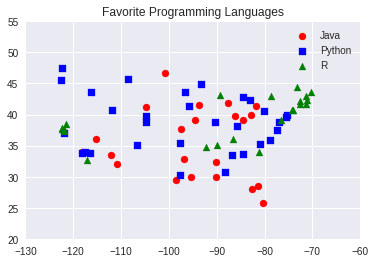

In [80]:
plot_cities()

In [81]:
import math as math

In [82]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))


In [97]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points, key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)


In [98]:
for k in [1, 3, 5, 7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city for other_city in city if other_city != city]
        
        preicted_language = knn_classifier(k, other_cities, city)
        
    if predicted_language == actual_language:
        num_correct += 1
        
    print(k, 'neighbor[s]:', num_correct, 'correct out of', len(cities))

TypeError: zip argument #1 must support iteration